In [1]:
import random
import tensorflow as tf
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import keras
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import sys
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, Activation
from keras.layers import SeparableConv2D, MaxPool2D, BatchNormalization
from keras.callbacks import ReduceLROnPlateau

In [5]:
import os
train_folder= "/content/drive/MyDrive/Data/Covid-19/Train"
#val_folder = "C:\Users\meiza\Documents\GitHub\CNN-Pneumonia\chest_xray\val"
test_folder = "/content/drive/MyDrive/Data/Covid-19/Test"

train_normal_folder= "/content/drive/MyDrive/Data/Covid-19/Train/Non_Covid"
#val_normal_folder = "C:\Users\meiza\Documents\GitHub\CNN-Pneumonia\chest_xray\val\NORMAL"
test_normal_folder = "/content/drive/MyDrive/Data/Covid-19/Test/Non_Covid"

train_covid_folder= "/content/drive/MyDrive/Data/Covid-19/Train/Covid-19"
#val_pneumonia_folder = "C:\Users\meiza\Documents\GitHub\CNN-Pneumonia\chest_xray\val\PNEUMONIA"
test_covid_folder = "/content/drive/MyDrive/Data/Covid-19/Test/Covid"

print(len(os.listdir(train_normal_folder)))
#print(len(os.listdir(val_normal_folder)))
print(len(os.listdir(test_normal_folder)))
print(len(os.listdir(train_covid_folder)))
#print(len(os.listdir(val_pneumonia_folder)))
print(len(os.listdir(test_covid_folder)))


1924
231
1003
177


In [6]:

model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 2 , activation = 'softmax'))
model.compile(optimizer = "adam" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128, 128, 64)      0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 64)       

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   width_shift_range = [-200,200],
                                   featurewise_center=False,
                                   samplewise_center=False,
                                   featurewise_std_normalization=False,
                                   samplewise_std_normalization=False,
                                   zca_whitening=False,
                                   )

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                                                    train_folder,
                                                    target_size=(256, 256),
                                                    batch_size=50,
                                                    class_mode='categorical')

    
test_generator = test_datagen.flow_from_directory(
                                                    test_folder,
                                                    target_size=(256, 256),
                                                    batch_size=40,
                                                    class_mode='categorical',
                                                    shuffle=False)


Found 2926 images belonging to 2 classes.
Found 408 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                    epochs=12,
                    verbose=1,
                    validation_data=test_generator,
                    class_weight={0:1.0, 1:0.4},
                    callbacks=[learning_rate_reduction])

Epoch 1/12
12/59 [=====>........................] - ETA: 8:51 - loss: 2.5644 - accuracy: 0.6366

<Figure size 432x288 with 0 Axes>

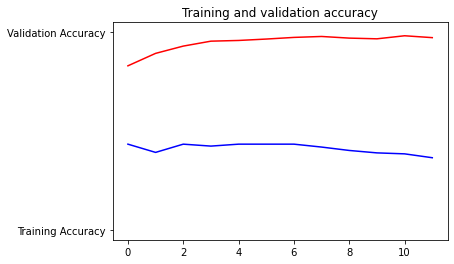

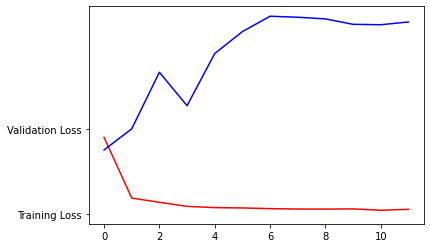

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()



plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

In [ ]:
print("Loss of the model is - " , model.evaluate(test_generator)[0]*100 , "%")
print("Accuracy of the model is - " , model.evaluate(test_generator)[1]*100 , "%")

408/408 [==============================] - 23s 57ms/step - loss: 2.2576 - accuracy: 0.3652
Loss of the model is -  225.75616836547852 %
408/408 [==============================] - 23s 56ms/step - loss: 2.2576 - accuracy: 0.3652
Accuracy of the model is -  36.51960790157318 %


In [ ]:
model.save('model.h5')

In [ ]:
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')

print(confusion_matrix(test_generator.classes, y_pred))

print('Classification Report')

target_names = ['Normal', 'COVID']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[143  34]
 [225   6]]
Classification Report
              precision    recall  f1-score   support

      Normal       0.39      0.81      0.52       177
       COVID       0.15      0.03      0.04       231

    accuracy                           0.37       408
   macro avg       0.27      0.42      0.28       408
weighted avg       0.25      0.37      0.25       408



In [ ]:
import matplotlib.pyplot as plt
from lime.lime_image import LimeImageExplainer
import keras
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from ipywidgets import IntProgress
from skimage.segmentation import mark_boundaries

In [ ]:
!pip install lime

     |████████████████████████████████| 276kB 8.6MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283846 sha256=95e3d3c134fb765e9d5c534f6cd2b97beeb41c8274064c0df6814886cf952caa
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [ ]:

model = keras.models.load_model('model.h5')
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
batch_normalization_10 (Batc (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128, 128, 64)      0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 64, 64, 64)       

In [ ]:
img = load_img('/content/drive/MyDrive/Data/Covid-19/Test/Non_Covid/Non-Covid (42).png', target_size=(256,256))
doc = keras.preprocessing.image.img_to_array(img)
doc1 = doc
#doc = tf.image.rgb_to_grayscale(doc)
doc = np.expand_dims(doc, axis=0)
doc = doc/255
predictions = model.predict(doc)
print(predictions)

[[0.00968326 0.99031675]]


In [ ]:
explainer = LimeImageExplainer()
explanation = explainer.explain_instance(doc[0].astype('double'), model.predict, top_labels=0, num_samples=10000, random_seed=42)

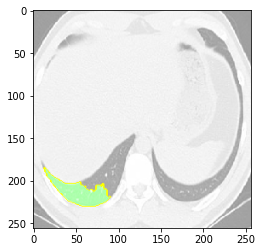

In [ ]:

temp, mask = explanation.get_image_and_mask(1, positive_only=False, num_features=1, hide_rest=False)
# plot image and mask together
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))